In [22]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import jax.numpy as jnp
from pathlib import Path

In [24]:
def load_quantum_states(data_dir):
    states = {}
    data_path = Path(data_dir)
    if not data_path.exists():
        print("Verzeichnis {data_dir} existiert nicht!")
        return states
    for file in data_path.glob('*.pickle'):
        try:
            with open(file, 'rb') as f:
                states[file.stem] = pickle.load(f)
        except Exception as e:
            print(f"Fehler beim Laden von {file}: {e}")
    return states

In [40]:
def visualize_quantum_state(state, title=None):
    """Visualisiert einen Quantum State als Dichtematrix."""
    # Konvertiere JAX-Array zu NumPy-Array\n",
    print(type(state[0]))
    print(type(state[1]))
    print(type(state[2]))
    if hasattr(state, '_value'):  # JAX-Array\n",
        
        state = np.array(state._value)
    elif isinstance(state, tuple):
        state = np.array(state[0])
   
    if isinstance(state, np.ndarray):
        plt.figure(figsize=(8, 6))
        plt.imshow(np.abs(state), cmap='viridis')
        plt.colorbar(label='Amplitude')
        if title:
            plt.title(title)
        plt.show()
    else:
        print(f"Unerwarteter Datentyp: {type(state)}")

Gefundene States: ['noisy_wigner_0', 'noisy_wigner_1', 'noisy_wigner_10', 'noisy_wigner_11', 'noisy_wigner_12', 'noisy_wigner_13', 'noisy_wigner_14', 'noisy_wigner_15', 'noisy_wigner_2', 'noisy_wigner_3', 'noisy_wigner_4', 'noisy_wigner_5', 'noisy_wigner_6', 'noisy_wigner_7', 'noisy_wigner_8', 'noisy_wigner_9', 'quantum_state_0', 'quantum_state_1', 'quantum_state_2', 'quantum_state_3', 'quantum_state_4', 'quantum_state_5', 'quantum_state_6', 'quantum_state_7']
<class 'jaxlib.xla_extension.ArrayImpl'>
<class 'jaxlib.xla_extension.ArrayImpl'>
<class 'numpy.ndarray'>


TypeError: Invalid shape (1000,) for image data

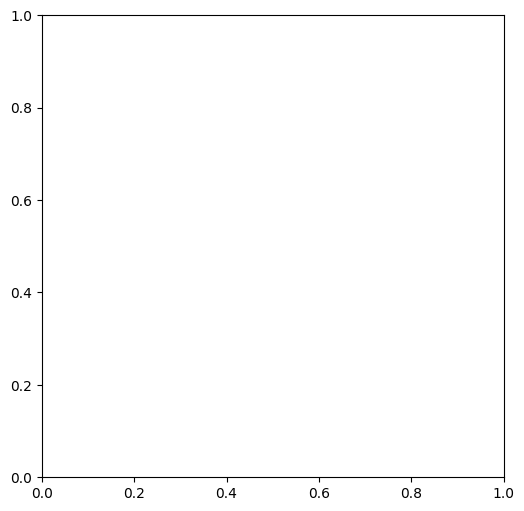

In [41]:
data_dir = '../../data/synthetic'
states = load_quantum_states(data_dir)
if states:
    print(f"Gefundene States: {list(states.keys())}")
    for name, state in states.items():
        visualize_quantum_state(state, title=f"Quantum State: {name}")
else:
    print("Keine States gefunden oder Verzeichnis existiert nicht.")